<a href="https://colab.research.google.com/github/sahilfaizal01/FMCG-Shopper-Analytics-Unveiling-Customer-Trends/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [663]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

# **Importing the dataset**

In [607]:
df = pd.read_csv('/content/drive/MyDrive/Customer-Analytics/segmentation data.csv',index_col=0)

# **Exploring the dataset**

In [608]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [610]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#**Correlation Analysis**

In [611]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


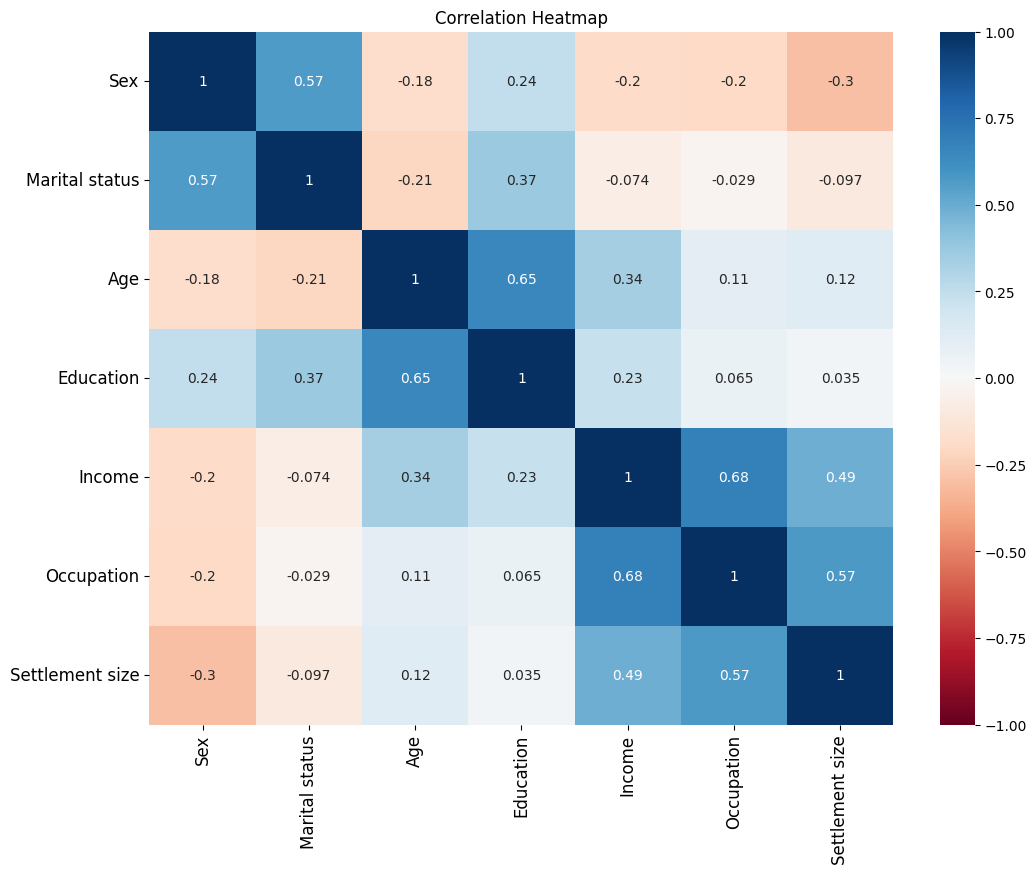

In [612]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

# **Visualizing the dataset**

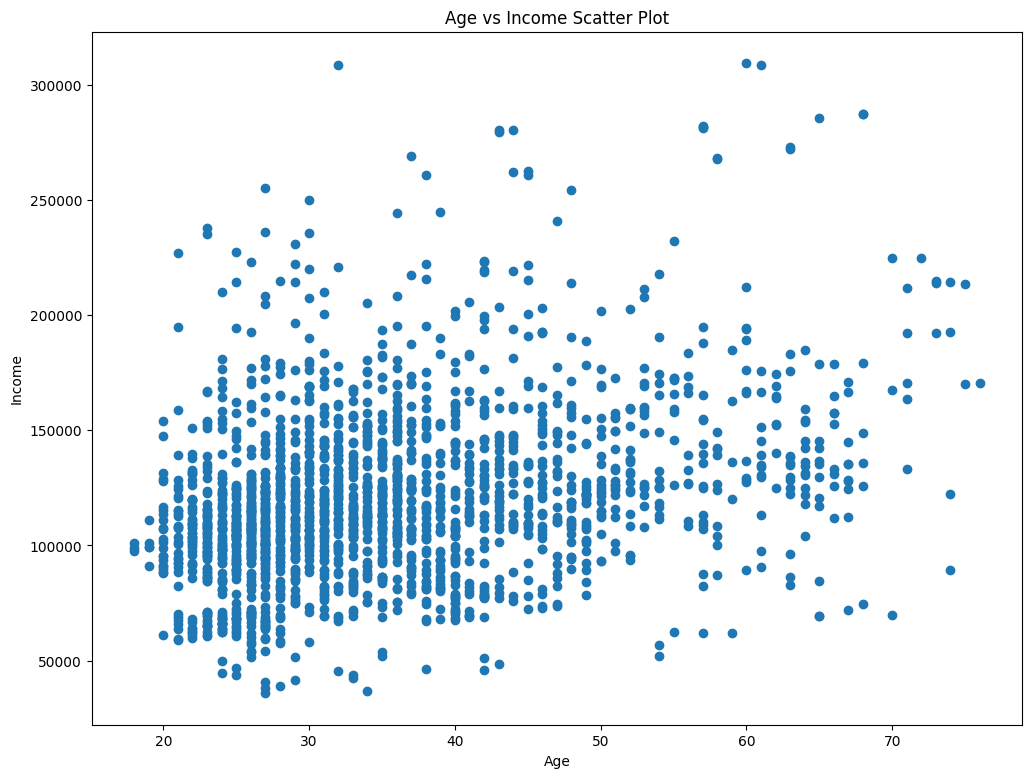

In [613]:
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Scatter Plot')
plt.show()

# **Standardization**

In [614]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [615]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# **Hierarchial Clustering**

In [616]:
hier_clust = linkage(segmentation_std,method='ward')

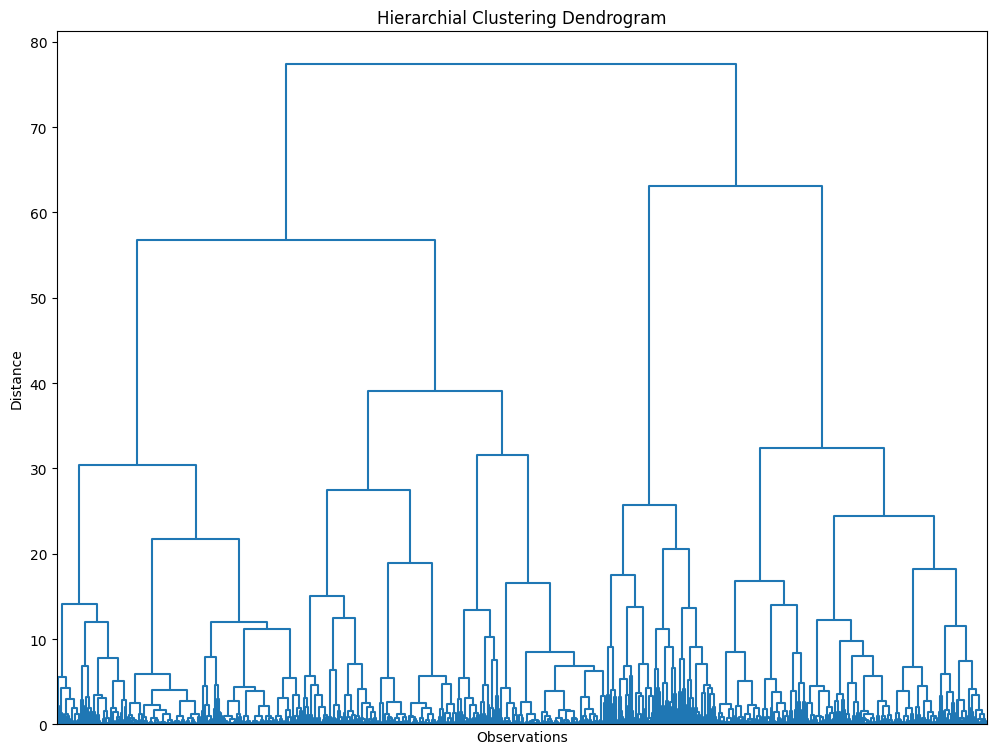

In [617]:
plt.figure(figsize=(12,9))
plt.title("Hierarchial Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 0)
plt.show()

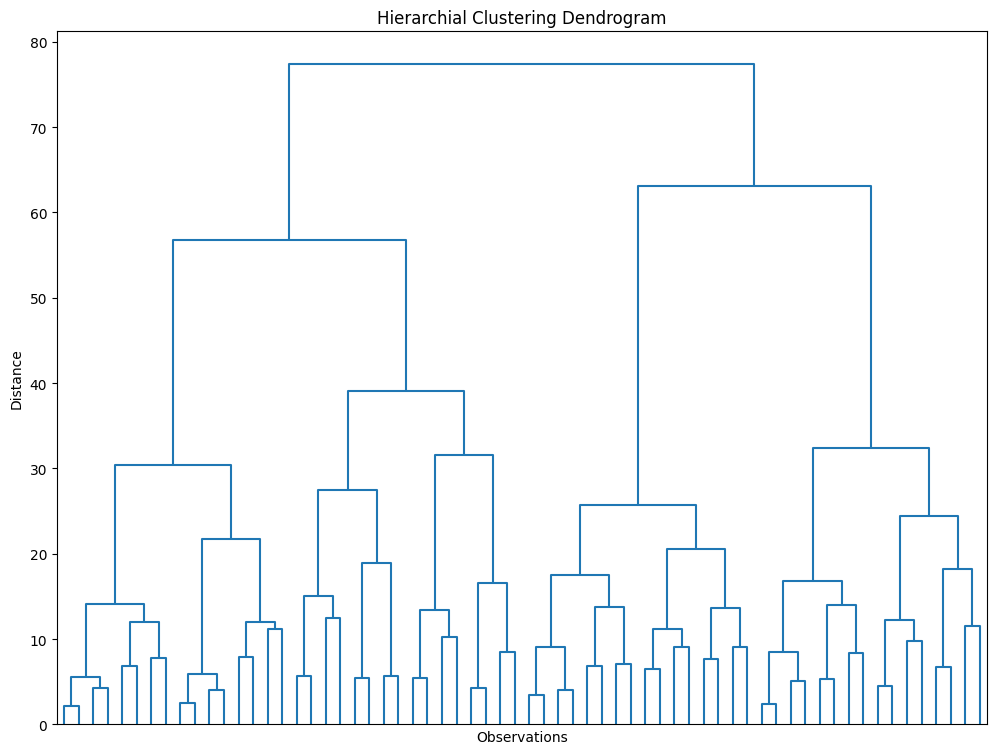

In [618]:
plt.figure(figsize=(12,9))
plt.title("Hierarchial Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust,
           show_leaf_counts = False,
           truncate_mode = 'level',
           p = 5,
           no_labels = True,
           color_threshold = 0)
plt.show()

In [619]:
# find the horizontal line on the dendrogram on which to cut
# Rule of thumb: We find the longest vertical line intercepted by a
# horizontal line from the dendrogram. This is where we should make the cut

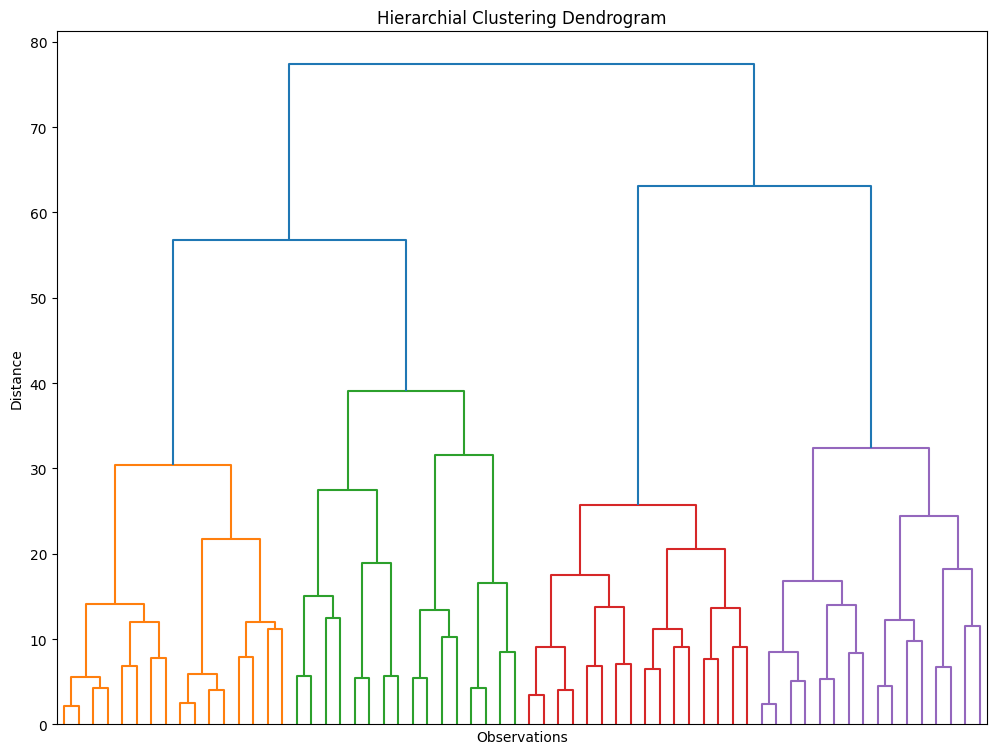

In [620]:
plt.figure(figsize=(12,9))
plt.title("Hierarchial Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust,
           show_leaf_counts = False,
           truncate_mode = 'level',
           p = 5,
           no_labels = True)
plt.show()

In [621]:
# even though slow, it is useful in finding the number of clusters
# start with hierarchial clustering to determine clusters, then move on to Flat clustering for segmentation

# **K-Means Clustering**

# **Working:-**
1.   ## Choose the number of clusters (K=2)
2.   ## Specify cluster seeds (Starting centroid)
3.   ## Calculate the centroid or the geometrical center



# **Limitations:-**

1. ## The squared Euclidean distance is quite sensitive to outliers - solved by K-Median Clustering
2. ## Choosing K value beforehand, if K is too small(K=1) the centroid will not lie inside the clusters and if K is too large(K=3) some of the clusters may be split into two
3. ## K-means enforces spherical clusters

## But K-Means is perfect for segmentation data


# kmeans++ is an initialization algorithm that finds the best cluster seeds

In [622]:
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

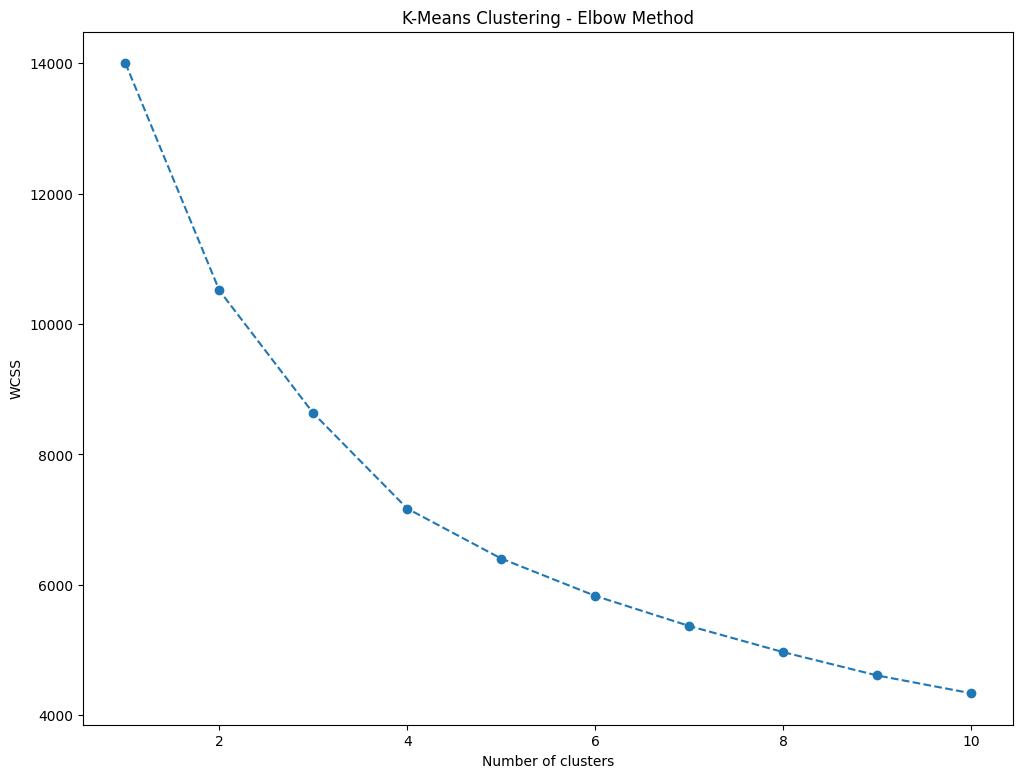

In [623]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('K-Means Clustering - Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [624]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [625]:
kmeans.fit(segmentation_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

# **Analyzing the results**

In [626]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [627]:
df_segm_analysis = df_segm_kmeans.groupby('Segment K-Means').mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [628]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-Means','Sex']].groupby(['Segment K-Means']).count()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment K-Means,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263


In [629]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [630]:
df_segm_analysis.rename({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunites',
    3: 'well-off'
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-Means,,,,,,,,,
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
fewer-opportunites,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [631]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunites',
    3: 'well-off'
})

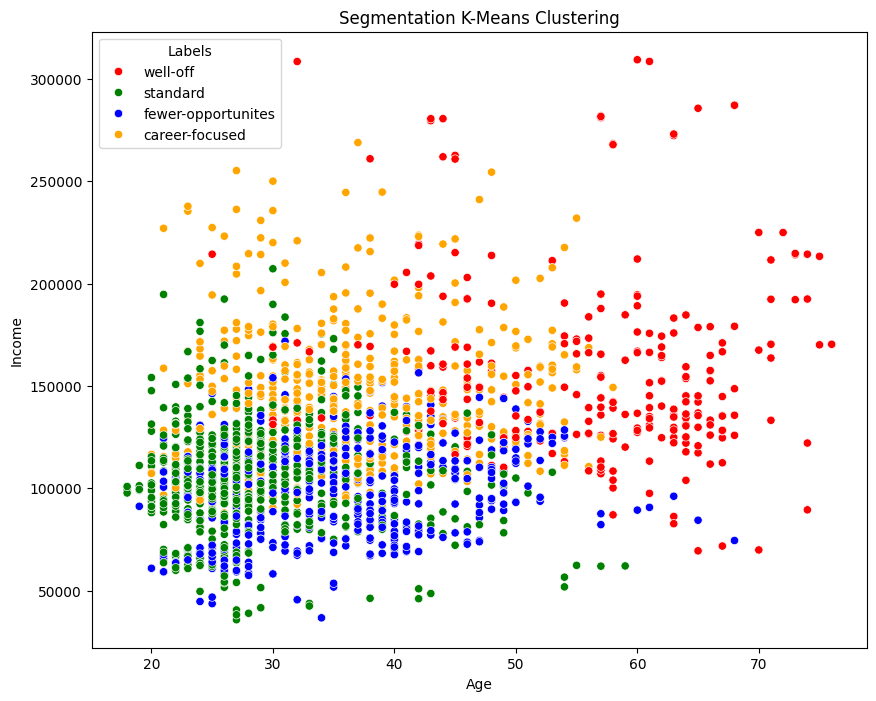

In [632]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'],palette = ['red', 'green', 'blue', 'orange'])
plt.title('Segmentation K-Means Clustering')
plt.show()

# **Principal Component Analysis**

In [633]:
pca = PCA()

In [634]:
pca.fit(segmentation_std)

PCA()

In [635]:
pca.explained_variance_ratio_ #these 7 components explains 100% of the data variability

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

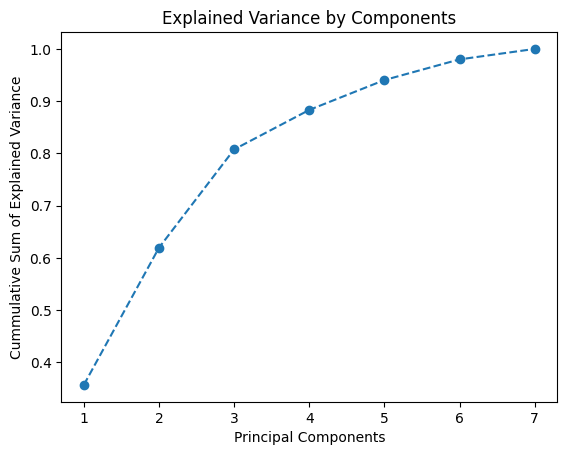

In [636]:
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Sum of Explained Variance')
plt.title('Explained Variance by Components')
plt.plot(range(1,8),np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.show()

# Rule of thumb - Keep 80% of the explained variance

In [637]:
pca = PCA(n_components=3)

In [638]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [639]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [640]:
# values represent loadings
# loading: correlation between an original variable and a component

In [641]:
df_pca_comp = pd.DataFrame(pca.components_,columns=df.columns,index=['Component-1','Component-2','Component-3'])
df_pca_comp #closer to zero lower the loading of a variable to a component

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component-1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component-2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component-3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


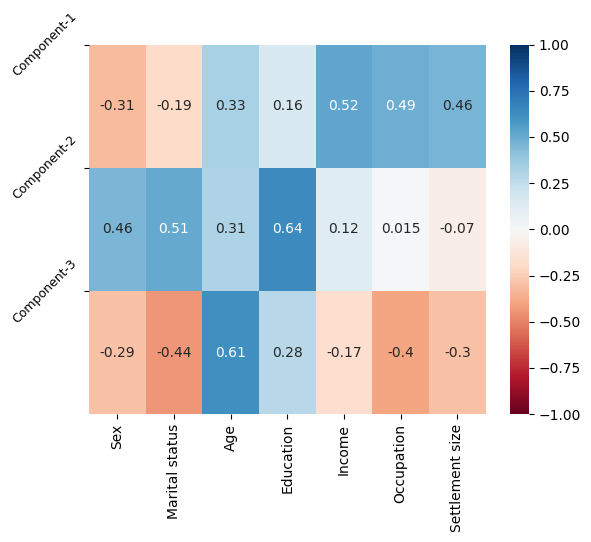

In [642]:
sns.heatmap(df_pca_comp,
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='RdBu')
plt.yticks([0,1,2],
           ['Component-1','Component-2','Component-3'],
           rotation=45,
           fontsize=9)
plt.show()

In [643]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [644]:
scores_pca = pca.transform(segmentation_std)

# **K-Means Clustering with PCA**

In [645]:
wcss = []

for k in range(1,11):
  kmeans_pca = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

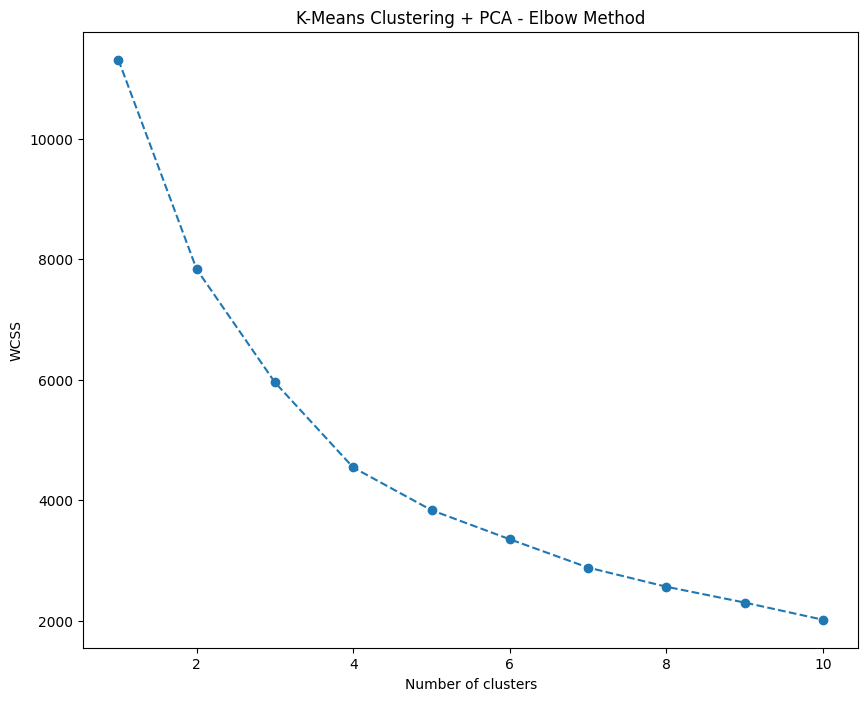

In [646]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('K-Means Clustering + PCA - Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [647]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

# **K-Means Clustering with PCA Results**

In [648]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component-1','Component-2','Component-3']
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [649]:
# Career, Education Lifestyle, Experience

In [650]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3,Segment K-Means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,3
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [651]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby('Segment K-Means PCA').mean()

In [652]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3
Segment K-Means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644


In [653]:
# 2 - well off segment - high for career, education, lifestyle and experience
# 3 - fewer opportunities - lowest for career and education and high on experience
# 1 - career focused - high for career low for others
# 0 - standard

In [654]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-Means PCA','Sex']].groupby(['Segment K-Means PCA']).count()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3,N Obs
Segment K-Means PCA,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460


In [655]:
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
3,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300


In [656]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({
    0: 'standard',
    1: 'career-focused',
    2: 'well-off',
    3: 'fewer-opportunites'
})

In [657]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3,N Obs,Prop Obs
Segment K-Means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
fewer-opportunites,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300


In [658]:
df_segm_pca_kmeans['Legends'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'well-off',
    3: 'fewer-opportunites'
})

In [659]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component-1,Component-2,Component-3,Segment K-Means PCA,Legends
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3,fewer-opportunites
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,3,fewer-opportunites
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3,fewer-opportunites
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


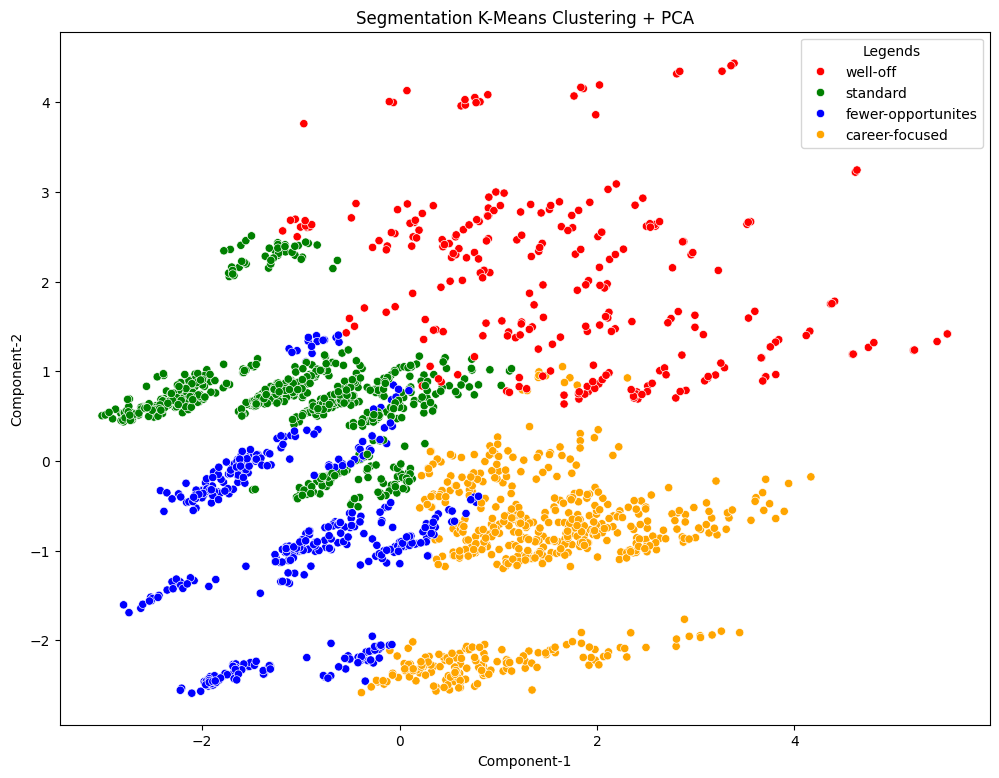

In [660]:
x_axis = df_segm_pca_kmeans['Component-1']
y_axis = df_segm_pca_kmeans['Component-2']
plt.figure(figsize=(12,9))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['Legends'],palette = ['red', 'green', 'blue', 'orange'])
plt.title('Segmentation K-Means Clustering + PCA')
plt.show()

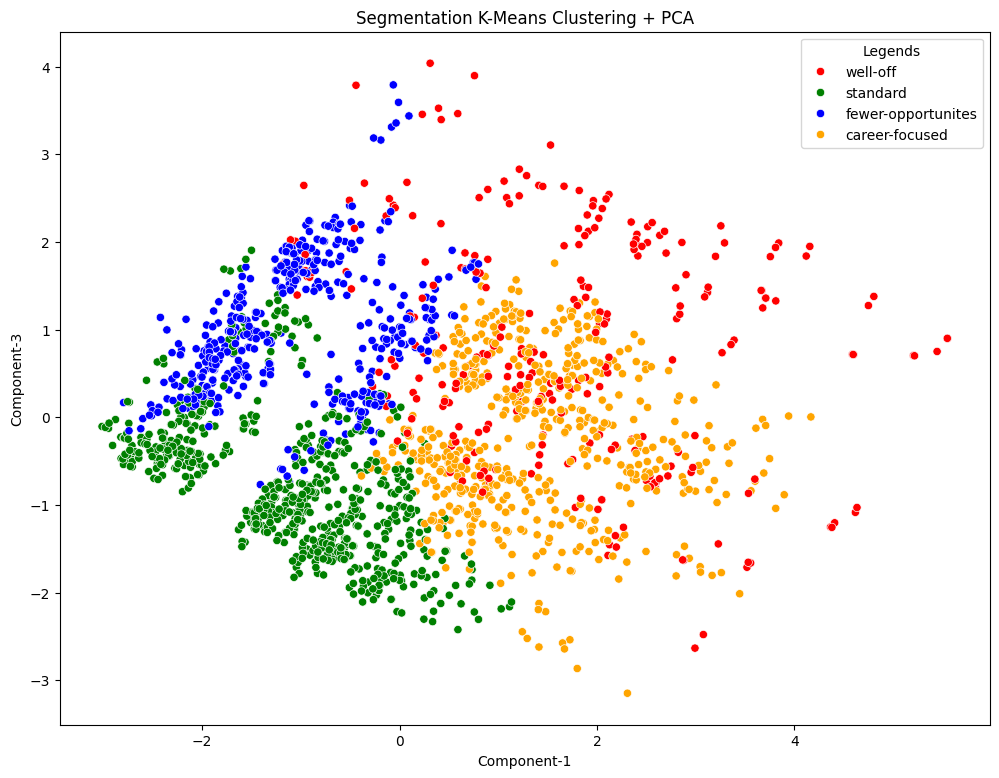

In [661]:
x_axis = df_segm_pca_kmeans['Component-1']
y_axis = df_segm_pca_kmeans['Component-3']
plt.figure(figsize=(12,9))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['Legends'],palette = ['red', 'green', 'blue', 'orange'])
plt.title('Segmentation K-Means Clustering + PCA')
plt.show()

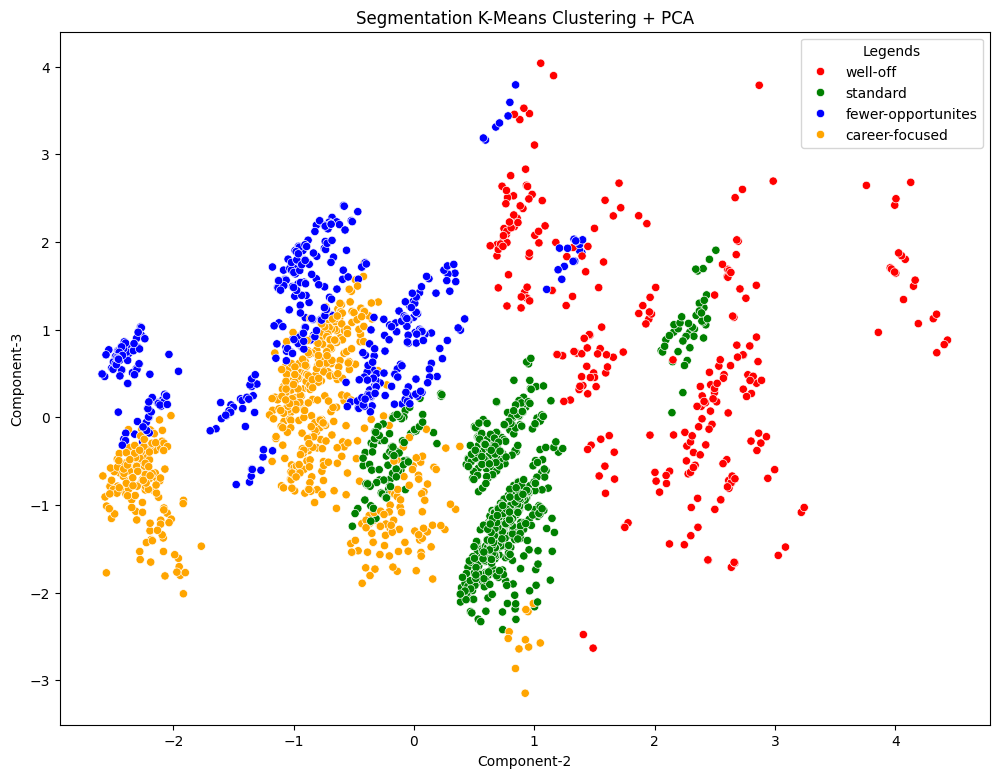

In [662]:
x_axis = df_segm_pca_kmeans['Component-2']
y_axis = df_segm_pca_kmeans['Component-3']
plt.figure(figsize=(12,9))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_pca_kmeans['Legends'],palette = ['red', 'green', 'blue', 'orange'])
plt.title('Segmentation K-Means Clustering + PCA')
plt.show()

In [660]:
# PCA Goal: reduce the number of features by combining them to form meaningful features
# they are orthogonal to each other so the difference between components is as high as possible

# **Data Export and Saving Models**

In [664]:
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(pca, open('pca.pkl','wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pkl','wb'))